## Problem statement : 

Review ratings by 5456 travelers (Users) on 24 tourist attractions across various sites in Europe
are considered. This data is the primary input for an automatic recommender system. Each
reviewer (User) has rated various attractions, such as churches, resorts, bakeries etc. and the
given ratings are all between 0 (lowest) and 5 (highest). Objective is to partition the sample of
travelers into clusters, so that tailored recommendations may be made for next travel
destinations.

In [39]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv("ReviewRatings.csv")

In [3]:
df.head()

,User,Churches,Resorts,Beaches,Parks,Theatres,Museums,Malls,Zoo,Restaurants,...,Art Galleries,Dance Clubs,Swimming Pools,Gyms,Bakeries,Spas,Cafes,View Points,Monuments,Gardens
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [4]:
df.shape

(5456, 25)

In [11]:
#separating out the dataframe to exclude the column with username
df_new = df.iloc[:,1:]

In [40]:
x = df.copy()

In [41]:
x.drop(["User"],axis=1,inplace=True)

In [42]:
import matplotlib.pyplot as plt

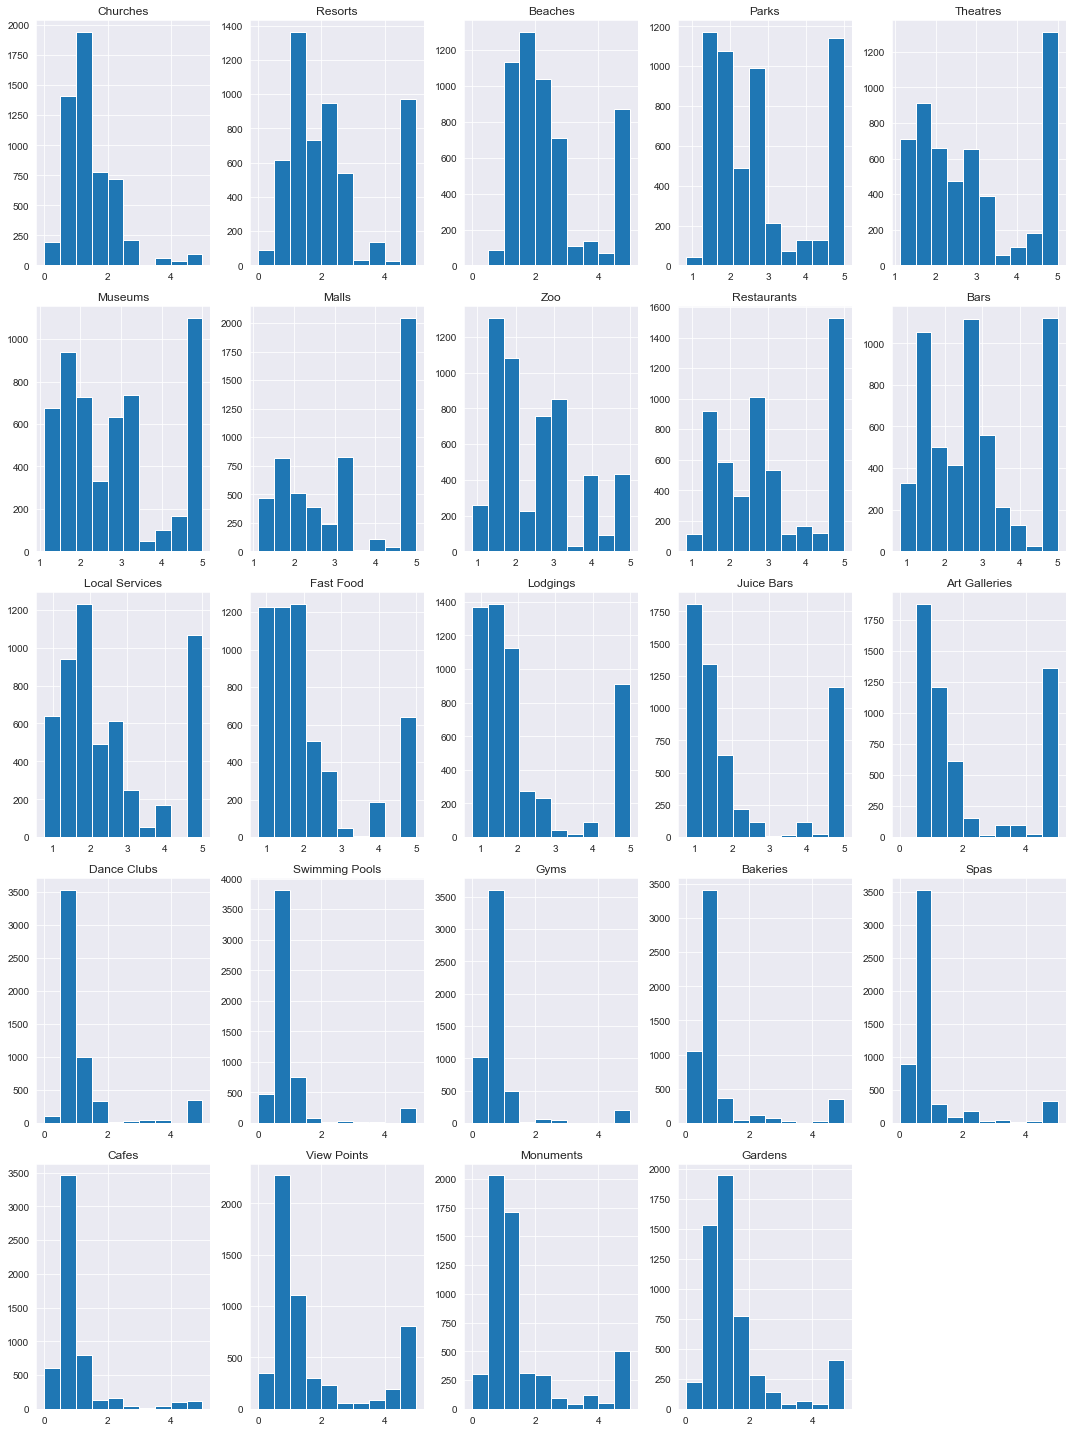

In [43]:
#Histograms of each of the numerical feature of the data. 

fig=plt.figure(figsize=(15,20))
ax=fig.gca()
x.hist(ax=ax)
plt.tight_layout()

#### Implication from histogram

The histograms show there is an inherent skewness in the attributes. Except for two attributes
(churches and zoo) most of the data is concentrated towards the lower ranks with a
disproportionate amount concentrated on rank 5.

In [44]:
AvgR=df.mean()

In [45]:
AvgR = AvgR.sort_values()

In [46]:
AvgR

Gyms              0.822414
Swimming Pools    0.949203
Cafes             0.965838
Bakeries          0.969811
Spas              1.000071
Dance Clubs       1.192801
Churches          1.455720
Monuments         1.531453
Gardens           1.560660
View Points       1.750537
Fast Food         2.078114
Lodgings          2.125511
Juice Bars        2.190861
Art Galleries     2.206573
Resorts           2.319707
Beaches           2.489331
Zoo               2.540795
Local Services    2.549754
Parks             2.796886
Bars              2.832729
Museums           2.893490
Theatres          2.958941
Restaurants       3.126019
Malls             3.351395
dtype: float64

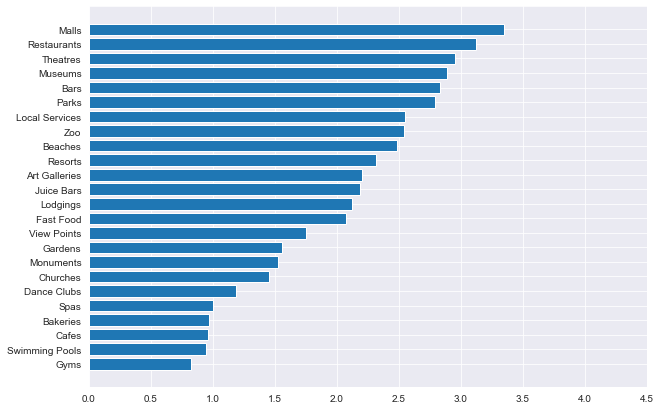

In [47]:
plt.figure(figsize=(10,7))
_=plt.barh(np.arange(len(df.columns[1:])),AvgR.values,align="center")
_=plt.xticks(np.arange(0,5,0.5))
_=plt.yticks(np.arange(len(df.columns[1:])),AvgR.index)

### Method #1 : Hierarchical Clustering or Agglomerative clustering

In [48]:
#Calculating the distance between multiple element clusters using ward linkage method

from scipy.cluster.hierarchy import dendrogram,fcluster,linkage
ward = linkage(df_new,method='ward',metric="euclidean")

In [36]:
df_new.shape

(5456, 24)

In [37]:
import matplotlib.pyplot as plt

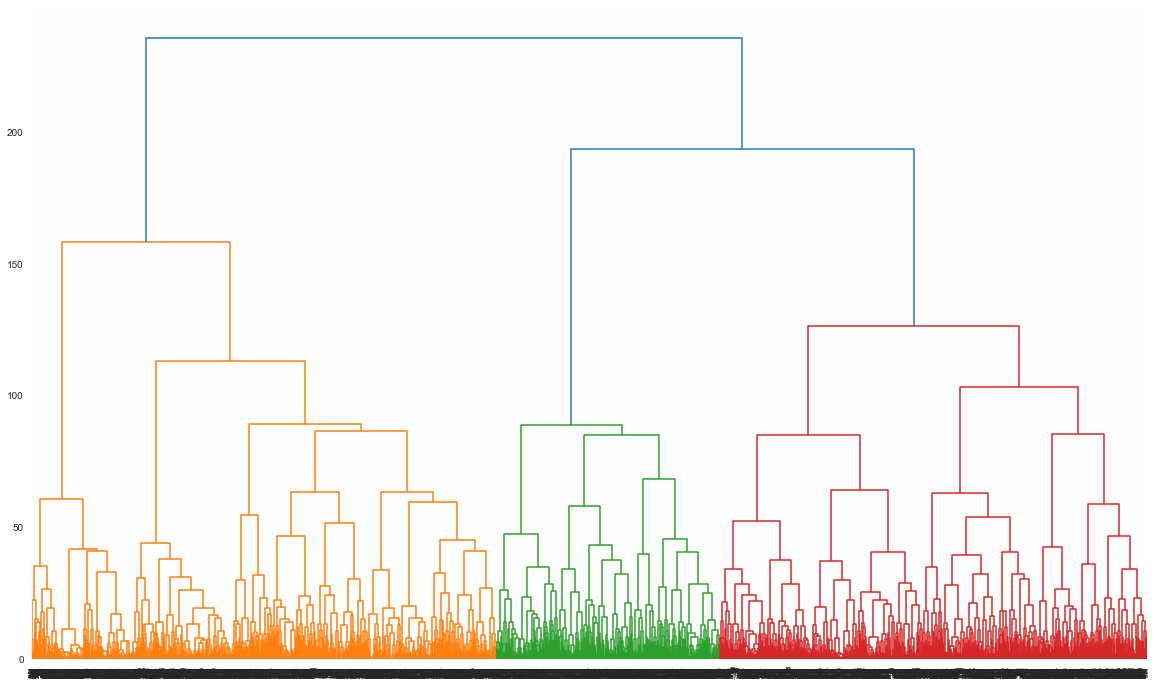

In [20]:
#Plotting the dendrogram to visualize the clusters formation in hierarchical form

plt.figure(figsize=(20,12))
dend = dendrogram(ward,color_threshold=None)

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Churches,5456.0,1.455720,0.827604,0.00,0.92,1.340,1.8100,5.0
Resorts,5456.0,2.319707,1.421438,0.00,1.36,1.905,2.6825,5.0
Beaches,5456.0,2.489331,1.247815,0.00,1.54,2.060,2.7400,5.0
Parks,5456.0,2.796886,1.309159,0.83,1.73,2.460,4.0925,5.0
Theatres,5456.0,2.958941,1.339056,1.12,1.77,2.670,4.3125,5.0
Museums,5456.0,2.893490,1.282400,1.11,1.79,2.680,3.8400,5.0
Malls,5456.0,3.351395,1.413492,1.12,1.93,3.230,5.0000,5.0
Zoo,5456.0,2.540795,1.111391,0.86,1.62,2.170,3.1900,5.0
Restaurants,5456.0,3.126019,1.356802,0.84,1.80,2.800,5.0000,5.0
Bars,5456.0,2.832729,1.307665,0.81,1.64,2.680,3.5300,5.0


In [31]:
df.head()

,User,Churches,Resorts,Beaches,Parks,Theatres,Museums,Malls,Zoo,Restaurants,...,Art Galleries,Dance Clubs,Swimming Pools,Gyms,Bakeries,Spas,Cafes,View Points,Monuments,Gardens
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [63]:
##For examination purposes, taking a subset of the data first and applying clustering to it
df_subset = df.iloc[100:121,1:]

In [64]:
df_subset.shape

(21, 24)

In [65]:
pd.set_option('display.max_columns',None)
df_subset.head()

,Churches,Resorts,Beaches,Parks,Theatres,Museums,Malls,Zoo,Restaurants,Bars,Local Services,Fast Food,Lodgings,Juice Bars,Art Galleries,Dance Clubs,Swimming Pools,Gyms,Bakeries,Spas,Cafes,View Points,Monuments,Gardens
100,1.26,1.30,1.31,5.00,4.89,5.0,5.0,2.73,2.45,1.97,1.58,0.83,0.80,0.79,0.81,0.89,1.13,0.71,0.68,0.67,0.69,0.84,5.0,1.25
101,1.25,1.28,1.30,1.34,4.10,5.0,5.0,2.73,2.47,2.45,1.58,0.83,0.81,0.80,0.87,0.88,1.13,1.13,0.68,0.67,0.70,0.79,5.0,1.24
102,1.25,1.27,1.30,1.34,4.10,5.0,5.0,2.73,2.49,2.46,1.58,0.84,0.81,0.80,0.81,0.88,1.13,0.88,0.68,0.67,0.70,0.78,5.0,1.24
103,1.25,1.27,1.30,1.34,4.90,5.0,5.0,2.73,2.50,1.97,1.58,0.84,0.81,0.80,0.80,0.88,1.13,1.13,0.68,0.67,0.69,0.79,5.0,1.24
104,1.25,1.27,1.30,1.34,4.89,5.0,5.0,2.73,2.48,1.98,1.58,0.84,0.82,0.80,0.81,0.88,1.13,1.13,0.68,0.67,0.70,0.79,5.0,1.24


In [66]:
from scipy.cluster.hierarchy import fcluster,linkage,dendrogram

#### Applying 'ward' method of Linkage

In [67]:
ward = linkage(df_subset,method='ward', metric='euclidean')

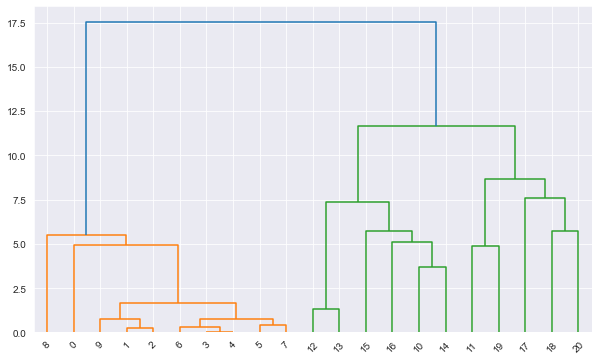

In [68]:
plt.figure(figsize=(10,6))
dend = dendrogram(ward)

#### Choosing 2 as the optimal number of clusters

In [71]:
clusters = fcluster(ward,12.5,criterion="distance")

In [72]:
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [73]:
df_subset["clusters"]=clusters

In [74]:
df_subset.columns

Index(['Churches', 'Resorts', 'Beaches', 'Parks', 'Theatres', 'Museums',
       'Malls', 'Zoo', 'Restaurants', 'Bars', 'Local Services', 'Fast Food',
       'Lodgings', 'Juice Bars', 'Art Galleries', 'Dance Clubs',
       'Swimming Pools', 'Gyms', 'Bakeries', 'Spas', 'Cafes', 'View Points',
       'Monuments', 'Gardens', 'clusters'],
      dtype='object')

In [75]:
Profile=df_subset.groupby("clusters")[['Churches', 'Resorts', 'Beaches', 'Parks', 'Theatres', 'Museums',
       'Malls', 'Zoo', 'Restaurants', 'Bars', 'Local Services', 'Fast Food',
       'Lodgings', 'Juice Bars', 'Art Galleries', 'Dance Clubs',
       'Swimming Pools', 'Gyms', 'Bakeries', 'Spas', 'Cafes', 'View Points',
       'Monuments', 'Gardens']].mean()

In [76]:
Profile

,Churches,Resorts,Beaches,Parks,Theatres,Museums,Malls,Zoo,Restaurants,Bars,Local Services,Fast Food,Lodgings,Juice Bars,Art Galleries,Dance Clubs,Swimming Pools,Gyms,Bakeries,Spas,Cafes,View Points,Monuments,Gardens
clusters,,,,,,,,,,,,,,,,,,,,,,,,
1,1.251000,1.274000,1.309000,1.702000,4.655000,4.906,5.000000,2.732000,2.473000,2.263000,1.580000,1.295000,0.824000,0.799000,0.810000,0.861000,1.111000,1.038000,0.807000,0.665000,0.698000,0.787000,4.954,1.241000
2,1.029091,2.311818,1.322727,1.336364,2.889091,4.230,4.857273,3.401818,2.830909,2.358182,1.853636,2.458182,2.439091,1.194545,0.790909,0.799091,0.841818,0.937273,0.794545,0.720909,0.656364,1.071818,0.750,2.611818


In [77]:
df_subset.head()

,Churches,Resorts,Beaches,Parks,Theatres,Museums,Malls,Zoo,Restaurants,Bars,Local Services,Fast Food,Lodgings,Juice Bars,Art Galleries,Dance Clubs,Swimming Pools,Gyms,Bakeries,Spas,Cafes,View Points,Monuments,Gardens,clusters
100,1.26,1.30,1.31,5.00,4.89,5.0,5.0,2.73,2.45,1.97,1.58,0.83,0.80,0.79,0.81,0.89,1.13,0.71,0.68,0.67,0.69,0.84,5.0,1.25,1
101,1.25,1.28,1.30,1.34,4.10,5.0,5.0,2.73,2.47,2.45,1.58,0.83,0.81,0.80,0.87,0.88,1.13,1.13,0.68,0.67,0.70,0.79,5.0,1.24,1
102,1.25,1.27,1.30,1.34,4.10,5.0,5.0,2.73,2.49,2.46,1.58,0.84,0.81,0.80,0.81,0.88,1.13,0.88,0.68,0.67,0.70,0.78,5.0,1.24,1
103,1.25,1.27,1.30,1.34,4.90,5.0,5.0,2.73,2.50,1.97,1.58,0.84,0.81,0.80,0.80,0.88,1.13,1.13,0.68,0.67,0.69,0.79,5.0,1.24,1
104,1.25,1.27,1.30,1.34,4.89,5.0,5.0,2.73,2.48,1.98,1.58,0.84,0.82,0.80,0.81,0.88,1.13,1.13,0.68,0.67,0.70,0.79,5.0,1.24,1


<AxesSubplot:xlabel='clusters', ylabel='Museums'>

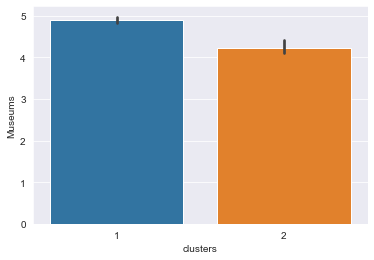

In [78]:
sns.barplot(x=df_subset["clusters"],y=df_subset["Museums"])

In [79]:
df_subset.head()

,Churches,Resorts,Beaches,Parks,Theatres,Museums,Malls,Zoo,Restaurants,Bars,Local Services,Fast Food,Lodgings,Juice Bars,Art Galleries,Dance Clubs,Swimming Pools,Gyms,Bakeries,Spas,Cafes,View Points,Monuments,Gardens,clusters
100,1.26,1.30,1.31,5.00,4.89,5.0,5.0,2.73,2.45,1.97,1.58,0.83,0.80,0.79,0.81,0.89,1.13,0.71,0.68,0.67,0.69,0.84,5.0,1.25,1
101,1.25,1.28,1.30,1.34,4.10,5.0,5.0,2.73,2.47,2.45,1.58,0.83,0.81,0.80,0.87,0.88,1.13,1.13,0.68,0.67,0.70,0.79,5.0,1.24,1
102,1.25,1.27,1.30,1.34,4.10,5.0,5.0,2.73,2.49,2.46,1.58,0.84,0.81,0.80,0.81,0.88,1.13,0.88,0.68,0.67,0.70,0.78,5.0,1.24,1
103,1.25,1.27,1.30,1.34,4.90,5.0,5.0,2.73,2.50,1.97,1.58,0.84,0.81,0.80,0.80,0.88,1.13,1.13,0.68,0.67,0.69,0.79,5.0,1.24,1
104,1.25,1.27,1.30,1.34,4.89,5.0,5.0,2.73,2.48,1.98,1.58,0.84,0.82,0.80,0.81,0.88,1.13,1.13,0.68,0.67,0.70,0.79,5.0,1.24,1


#### Applying complete method for Linkage

In [80]:
Single_Euc = linkage(df_subset,method='complete', metric='euclidean')

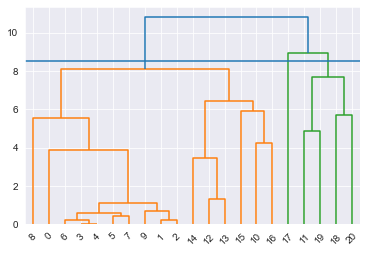

In [81]:
dend_2 = dendrogram(Single_Euc,color_threshold=10)
plt.axhline(y=8.5)

In [57]:
clusters_1 = fcluster(Single_Euc,8.5,criterion="distance")

In [58]:
clusters_1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 2, 2, 2],
      dtype=int32)

In [83]:
#This method made 3 clusters

#### Applying on the whole dataset. Linkage Method used is ward

In [84]:
ward_3 = linkage(x,method="ward",metric="euclidean")

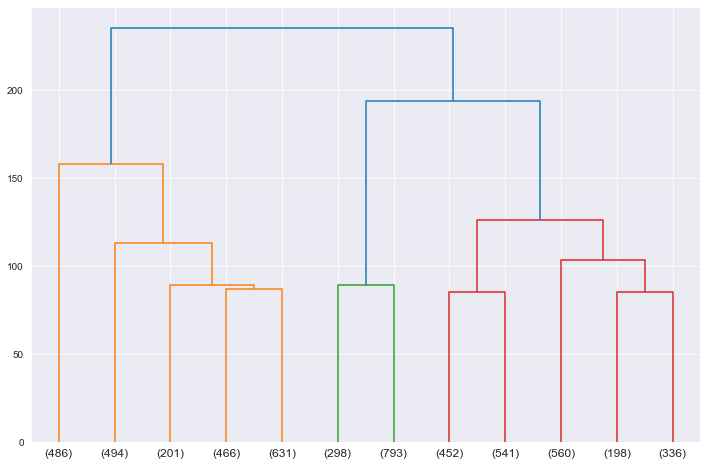

In [85]:
plt.figure(figsize=(12,8))
dend_3 = dendrogram(ward_3,p=12,truncate_mode="lastp")

In [86]:
clusters_analysis = fcluster(ward_3,12,criterion="maxclust")

In [87]:
df_analysis = x[['Resorts', 'Beaches','Spas','View Points']]

In [88]:
df_analysis["Clusters"] = clusters_analysis

In [89]:
df_analysis.groupby("Clusters").mean()

,Resorts,Beaches,Spas,View Points
Clusters,,,,
1,0.905679,1.573951,1.073786,0.548333
2,1.433259,1.547166,0.222267,1.317935
3,2.026816,2.301642,0.746219,1.105473
4,3.394485,2.389700,0.770579,0.846159
5,2.179794,2.158114,0.800777,0.923930
6,2.714094,2.563960,2.066342,4.348557
7,2.851828,2.660277,2.201173,1.889937
8,3.476261,4.542412,0.442367,0.831438
9,1.922569,1.987153,0.658262,0.909852


## K-Means

In [90]:
x.head()

,Churches,Resorts,Beaches,Parks,Theatres,Museums,Malls,Zoo,Restaurants,Bars,Local Services,Fast Food,Lodgings,Juice Bars,Art Galleries,Dance Clubs,Swimming Pools,Gyms,Bakeries,Spas,Cafes,View Points,Monuments,Gardens
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [91]:
from sklearn.cluster import KMeans

In [92]:
wss=[]
for i in range(1,20):
    KMeans1 =KMeans(n_clusters=i,init='k-means++')
    KM=KMeans1.fit(x)
    wss.append(KM.inertia_)

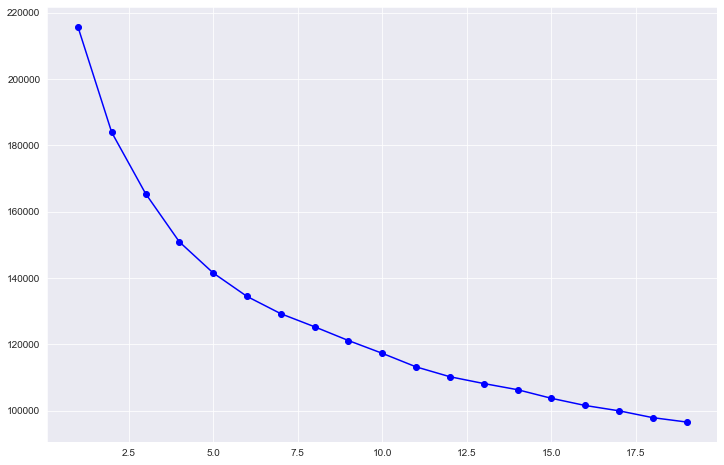

In [93]:
plt.figure(figsize=(12,8))
_=plt.plot(range(1,20),wss,marker="o",color="blue")

In [94]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [95]:
x.head()

,Churches,Resorts,Beaches,Parks,Theatres,Museums,Malls,Zoo,Restaurants,Bars,Local Services,Fast Food,Lodgings,Juice Bars,Art Galleries,Dance Clubs,Swimming Pools,Gyms,Bakeries,Spas,Cafes,View Points,Monuments,Gardens
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [96]:
Sil_Score=[]
for i in range(2,20):
    KM=KMeans(n_clusters=i,init='k-means++',random_state=42)
    KM.fit(x)
    clusters=KM.labels_
    Sil_Score1=(silhouette_score(x,clusters))
    Sil_Score.append(Sil_Score1)
    print("The silhouette score for {} clusters is {}".format(i,Sil_Score1))

The silhouette score for 2 clusters is 0.1442569814816467
The silhouette score for 3 clusters is 0.1445295138113021
The silhouette score for 4 clusters is 0.14709146191619862
The silhouette score for 5 clusters is 0.15218190496510936
The silhouette score for 6 clusters is 0.15008440032028397
The silhouette score for 7 clusters is 0.1564575839973378
The silhouette score for 8 clusters is 0.1536631167483141
The silhouette score for 9 clusters is 0.14819139855300445
The silhouette score for 10 clusters is 0.16041672849726019
The silhouette score for 11 clusters is 0.15922196734726993
The silhouette score for 12 clusters is 0.16669803666691582
The silhouette score for 13 clusters is 0.1557081741153723
The silhouette score for 14 clusters is 0.1581144976709287
The silhouette score for 15 clusters is 0.17058342273607088
The silhouette score for 16 clusters is 0.15443449410999857
The silhouette score for 17 clusters is 0.16607734007086797
The silhouette score for 18 clusters is 0.160709541583

<AxesSubplot:>

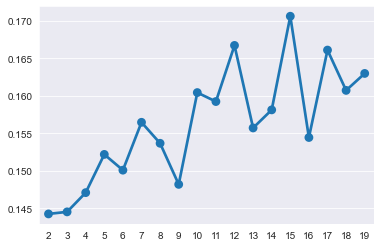

In [97]:
sns.pointplot(list(range(2,20)),Sil_Score)

In [98]:
list = range(2,20)

In [99]:
Sil_Dict = {"Number of clusters":list,"Silhouette Score":Sil_Score}

In [100]:
df3 = pd.DataFrame(Sil_Dict)
df3

,Number of clusters,Silhouette Score
0,2,0.144257
1,3,0.144530
2,4,0.147091
3,5,0.152182
4,6,0.150084
5,7,0.156458
6,8,0.153663
7,9,0.148191
8,10,0.160417
9,11,0.159222


In [101]:
df3[df3["Silhouette Score"]==df3["Silhouette Score"].max()]["Number of clusters"]

13    15
Name: Number of clusters, dtype: int64

In [102]:
ss={1:0}

In [103]:
type(ss)

dict

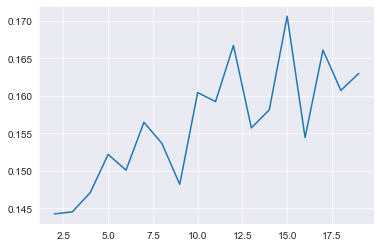

In [104]:
plt.plot(range(2,20),Sil_Score)

In [105]:
max(Sil_Score)

0.17058342273607088

In [106]:
x_full=x.copy()

In [107]:
import numpy as np

In [108]:
from scipy.cluster.vq import vq

In [109]:
from tabulate import tabulate

In [110]:
for i in range(3,7):
    x=KMeans(n_clusters=i, random_state=0).fit(x_full).cluster_centers_
    partition, euc_distance_to_centroids = vq(x_full, x)

For n_clusters = 2 The average silhouette_score is : 0.1442569814816467
For n_clusters = 3 The average silhouette_score is : 0.14447553575968172
For n_clusters = 4 The average silhouette_score is : 0.14705383893517043
For n_clusters = 5 The average silhouette_score is : 0.15224512327486586
For n_clusters = 6 The average silhouette_score is : 0.15011090136512403
For n_clusters = 7 The average silhouette_score is : 0.15653396608133124
For n_clusters = 8 The average silhouette_score is : 0.14196444137185057
For n_clusters = 9 The average silhouette_score is : 0.15452395871433816
For n_clusters = 10 The average silhouette_score is : 0.16316694792903658
For n_clusters = 11 The average silhouette_score is : 0.16207520011750656
For n_clusters = 12 The average silhouette_score is : 0.16523108875408166
For n_clusters = 13 The average silhouette_score is : 0.15754717479969552
For n_clusters = 14 The average silhouette_score is : 0.1573470642178577
For n_clusters = 15 The average silhouette_score

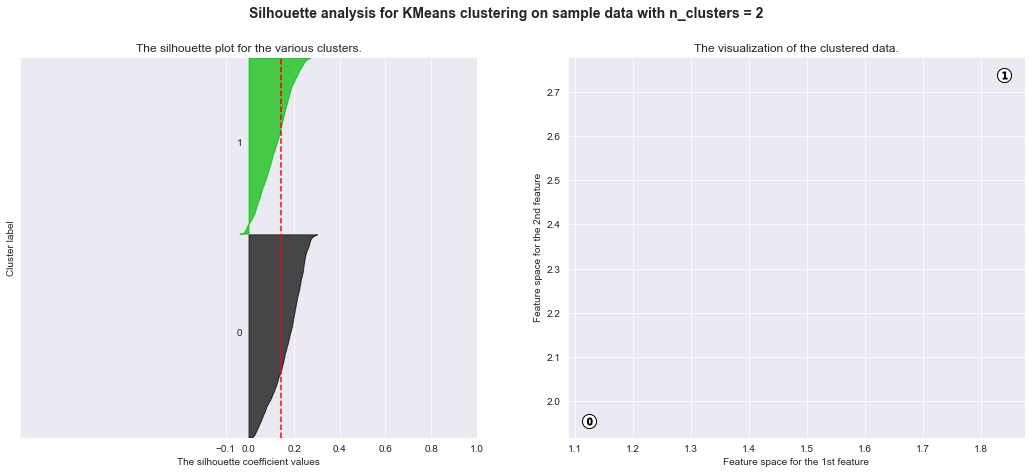

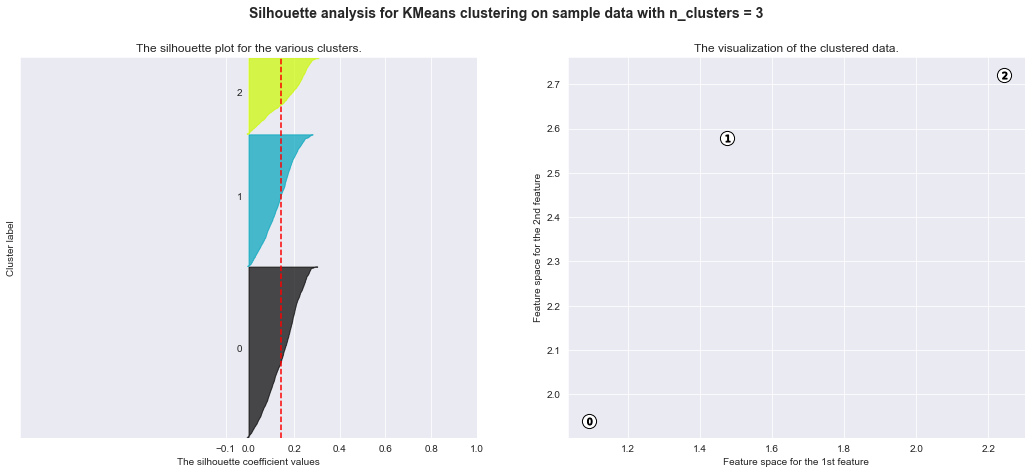

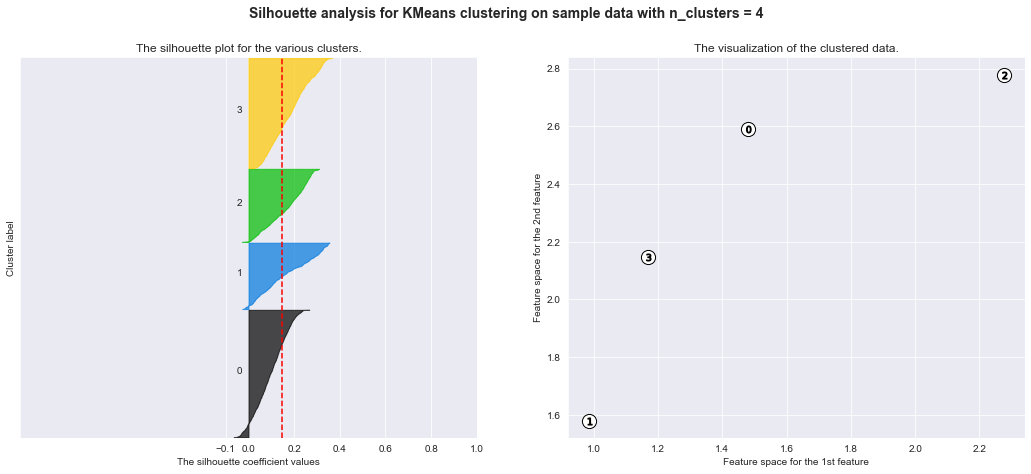

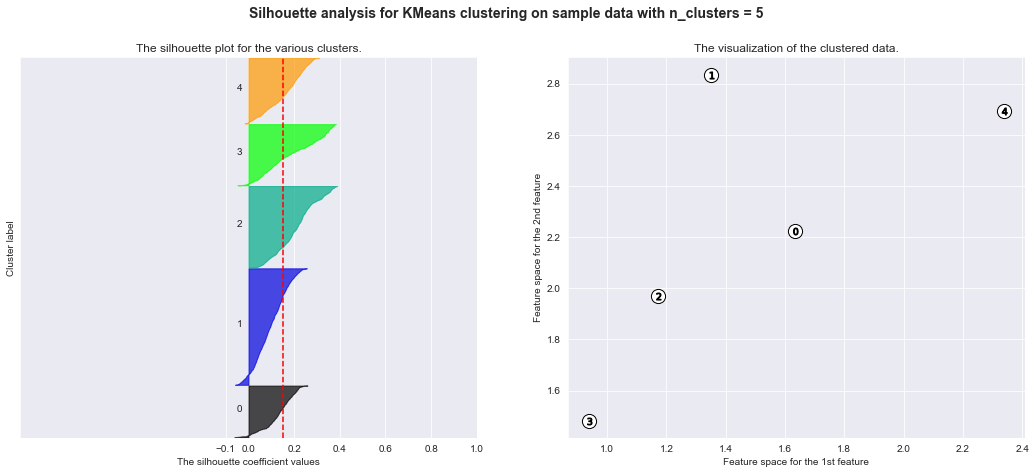

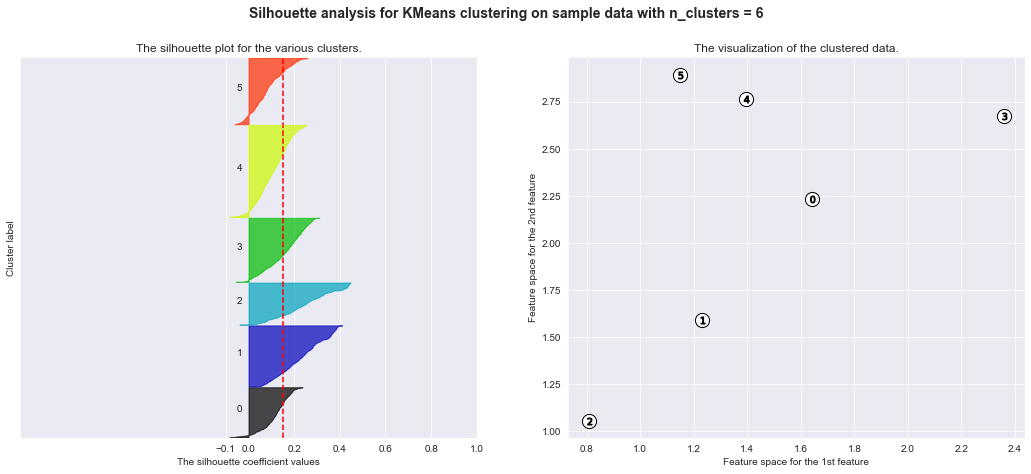

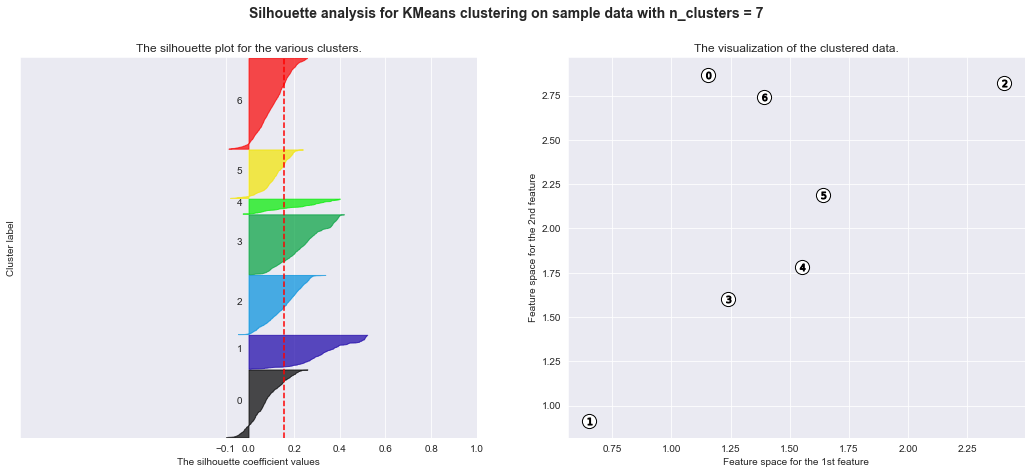

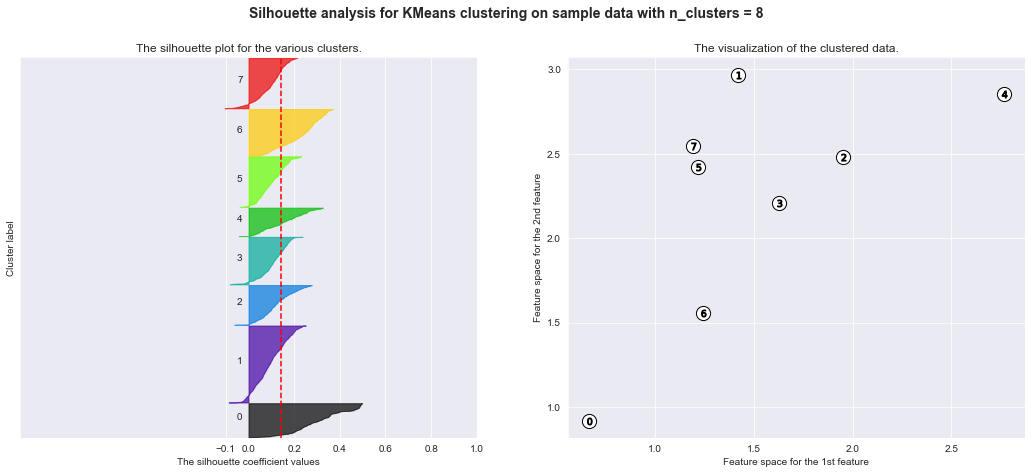

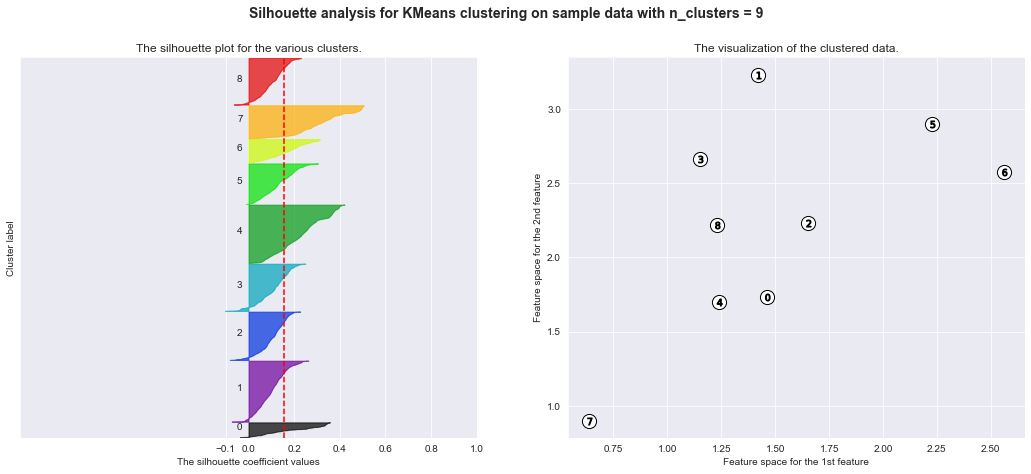

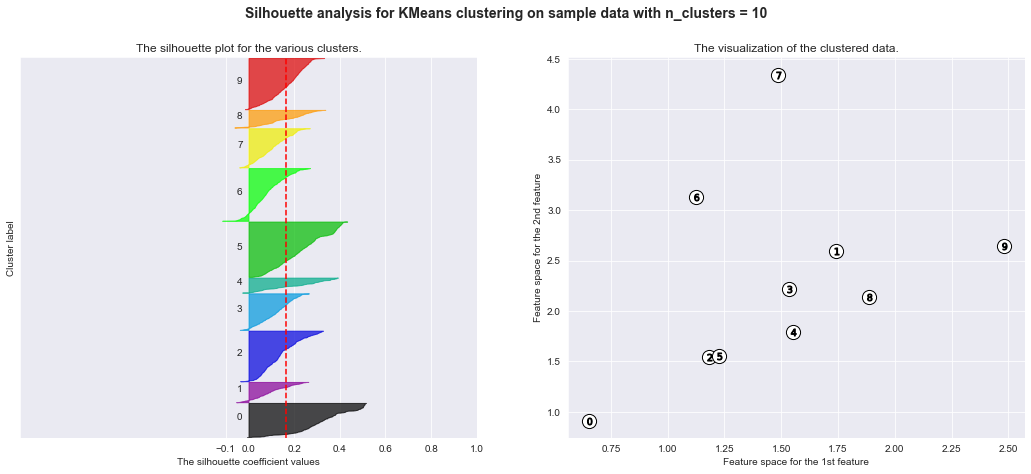

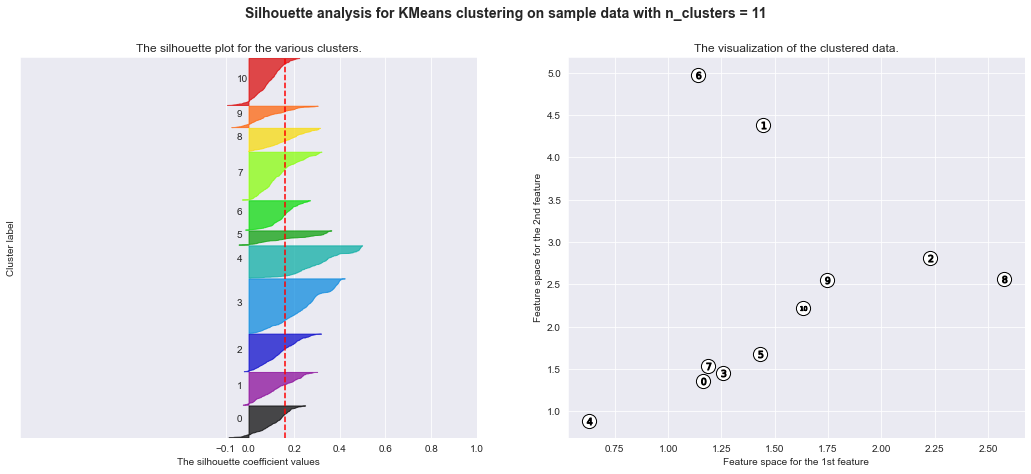

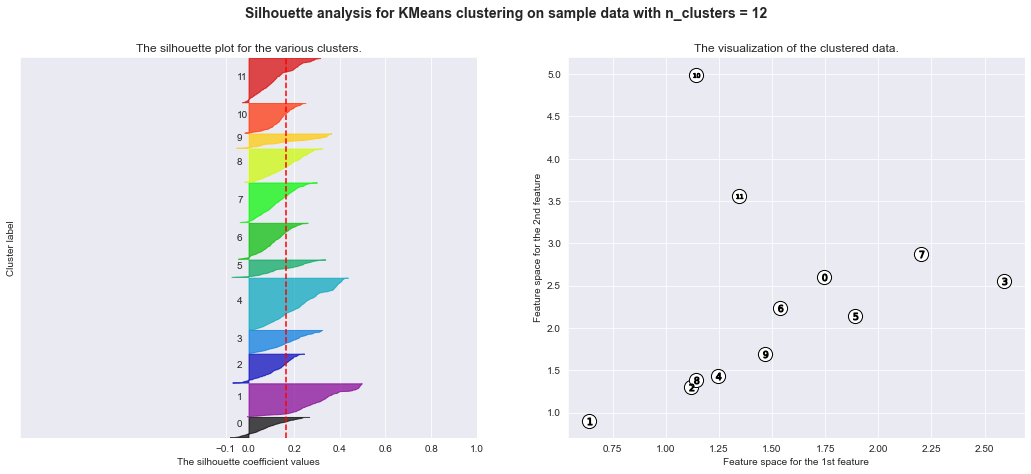

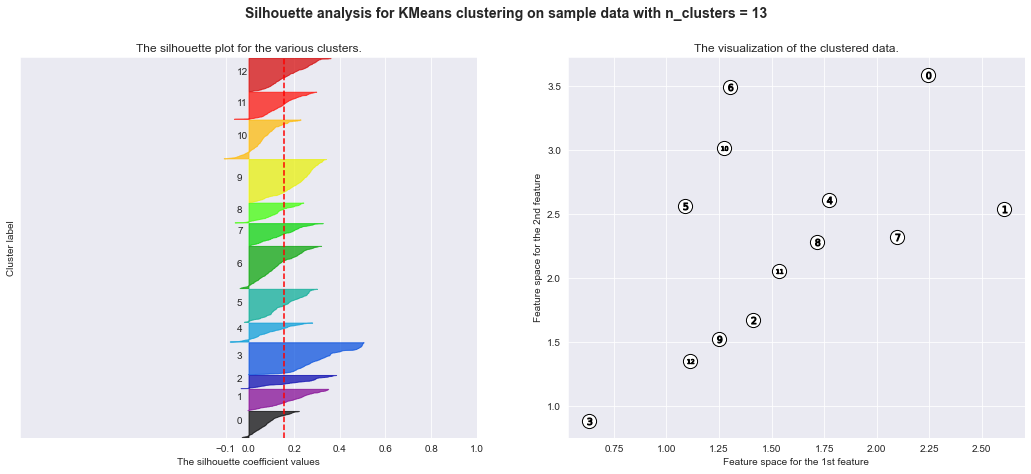

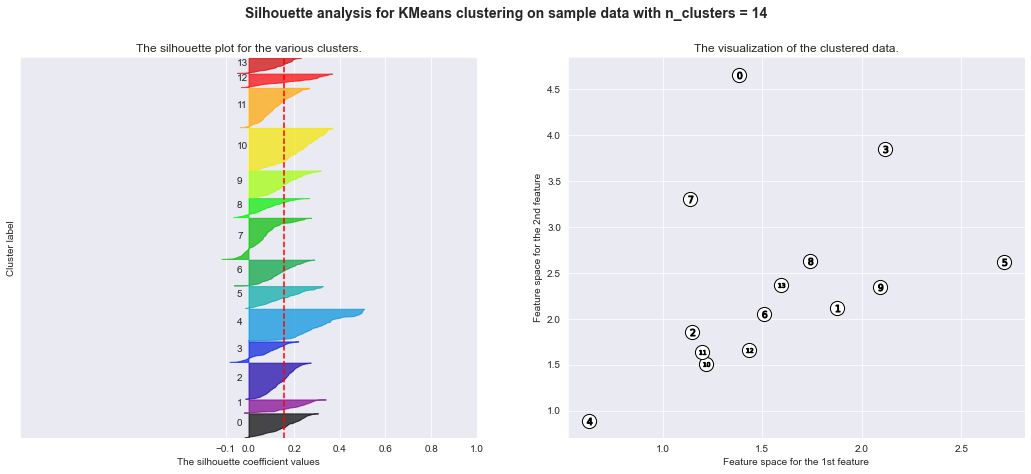

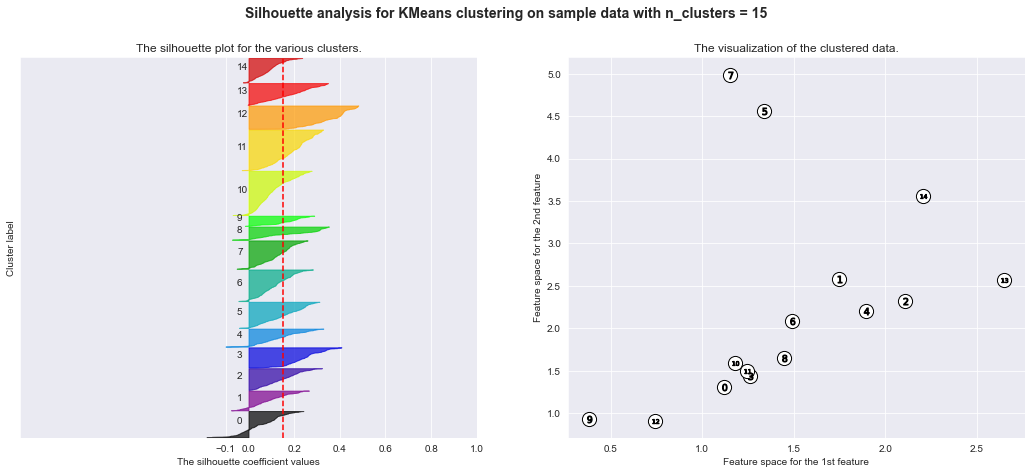

In [111]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=x_full  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    #ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),fontsize=14, fontweight='bold')

plt.show()

# END